In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
# Function to calculate custom accuracy
def custom_accuracy(y_true, y_pred):
    return np.mean(1 - np.abs((y_true - y_pred) / y_true))

In [8]:
# Function to preprocess data
def preprocess_data(data):
    # Ensure 'Volume' and 'Close' are treated as strings and then convert to numeric
    if 'Volume' in data.columns:
        data['Volume'] = data['Volume'].astype(str).str.replace(',', '')
        data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')
    if 'Close' in data.columns:
        data['Close'] = data['Close'].astype(str).str.replace(',', '')
        data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

    # Drop unnecessary columns if they exist
    columns_to_drop = ['Date', 'Adj Close']
    for column in columns_to_drop:
        if column in data.columns:
            data = data.drop(columns=[column])

    return data

In [9]:
# Load the training and testing data
train_path = '/content/Google_train_data.csv'
test_path = '/content/Google_test_data.csv'
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [10]:
# Preprocess the data
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

In [11]:
# Separate features and target variable in training data
X_train = train_data.drop(columns=['Close'])
y_train = train_data['Close']

In [12]:
# Separate features and target variable in testing data
X_test = test_data.drop(columns=['Close'])
y_test = test_data['Close']

In [13]:
# Define and train the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=200,
                          random_state=42)

In [14]:
# Evaluate model performance
y_pred = model.predict(X_test)

In [15]:
# Calculate custom accuracy
accuracy = custom_accuracy(y_test.values, y_pred)
print(f'Custom Accuracy: {accuracy:.4f}')

Custom Accuracy: 0.7084


In [16]:
# Evaluate using standard metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 332.62
Mean Squared Error (MSE): 114657.60
Root Mean Squared Error (RMSE): 338.61


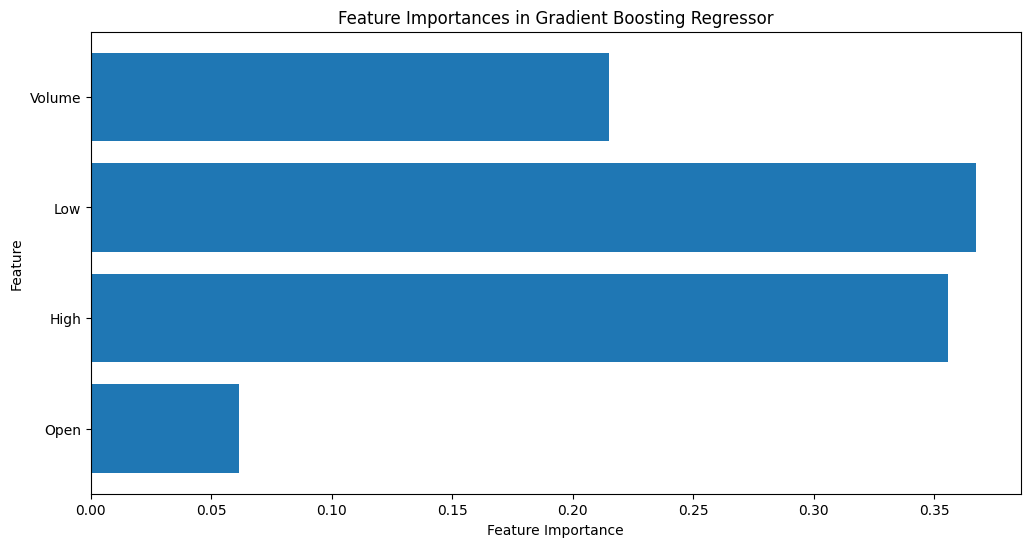

In [17]:
# Plot feature importances
plt.figure(figsize=(12, 6))
feature_importances = model.feature_importances_
features = X_train.columns
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Gradient Boosting Regressor')
plt.show()

In [18]:
# Function to make predictions with new input data
def predict_new(input_data):
    input_df = pd.DataFrame(input_data, index=[0])
    prediction = model.predict(input_df)
    return prediction[0]

# Example input data
new_input = {
    'Open': 1500,
    'High': 1520,
    'Low': 1480,
    'Volume': 1200000
}

# Make a prediction with the new input data
predicted_close = predict_new(new_input)
print(f'Predicted Close Price: {predicted_close:.2f}')

Predicted Close Price: 803.15
